<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Homework-4" data-toc-modified-id="Homework-4-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Homework 4</a></span><ul class="toc-item"><li><span><a href="#Question-1:-Consider-three-fictional-Polynesian-islands." data-toc-modified-id="Question-1:-Consider-three-fictional-Polynesian-islands.-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Question 1: Consider three fictional Polynesian islands.</a></span></li><li><span><a href="#Question-2:-marriage,-age,-and-happiness-collider-bias" data-toc-modified-id="Question-2:-marriage,-age,-and-happiness-collider-bias-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Question 2: marriage, age, and happiness collider bias</a></span></li><li><span><a href="#Question-3:-urban-fox-analysis" data-toc-modified-id="Question-3:-urban-fox-analysis-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Question 3: urban fox analysis</a></span></li></ul></li><li><span><a href="#Notes" data-toc-modified-id="Notes-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Notes</a></span><ul class="toc-item"><li><span><a href="#Q1" data-toc-modified-id="Q1-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Q1</a></span></li></ul></li></ul></div>

# Homework 4

## Question 1: Consider three fictional Polynesian islands. 

On each there is a Royal Ornithologist charged by the king with surveying the birb population. They have each found the following proportions of 5 important birb species:

-|Birb A | Birb B | Birb C | Birb D | Birb E
-|-------|--------|--------|--------|-------
Island 1| 0.2 |0.2 |0.2| 0.2| 0.2
Island 2| 0.8|0.1|0.05|0.025|0.025
Island 3|0.05|0.15|0.7|0.05|0.05


Notice that each row sums to 1, all the birbs. This problem has two parts. It
is not computationally complicated. But it is conceptually tricky.

* <b><font color = 'purple'>First </font></b>, compute the entropy of each island’s birb distribution. <b><font color = 'purple'>Interpret </font></b> these entropy values. 


* <b><font color = 'purple'>Second </font></b>, use each island’s birb distribution to predict the other two. 

    This means to compute the K-L Divergence of each island from the others, treating each island as if it were a statistical model of the other islands. 
    
    You should end up with 6 different K-L Divergence values. 
    
    <font color = 'purple'><b>Which</b> island predicts the others best? Why? </font>

##### <b><font color = 'MAROON'>entropy of each island’s birb distribution</font></b>

$H(p) = −( p_1*log(p_1) + p_2*log(p_2)) ≈ 0.61 $

In [11]:
# bas
p <- c(0.2, 0.2, 0.2, 0.2, 0.2)
-sum( p*log(p) )

[1] 1.609438

In [42]:
H <- function(p) -sum(p*log(p))

entropy <- compose(H,
                  ~ round(., digits = 3),
                  .dir = 'forward')

# island 1
entropy(c(0.2, 0.2, 0.2, 0.2, 0.2))

# island 2
entropy(c(0.8, 0.1, 0.05, 0.025, 0.025))

# island 3
entropy(c(0.05, 0.15, 0.7, 0.05, 0.05))

[1] 1.609

[1] 0.743

[1] 0.984

In [20]:
# Teacher soln
H <- function(p) -sum(p*log(p))
IB <- list()

IB[[1]] <- c( 0.2 , 0.2 , 0.2 , 0.2 , 0.2 )
IB[[2]] <- c( 0.8 , 0.1 , 0.05 , 0.025 , 0.025 )
IB[[3]] <- c( 0.05 , 0.15 , 0.7 , 0.05 , 0.05 )

map( IB , H ) # sapply( IB , H )

[[1]]
[1] 1.609438

[[2]]
[1] 0.7430039

[[3]]
[1] 0.9836003

Flatest distribution has the highest entropy because entropy is a measure of potential surprise, with distributions with lower potential surprise having higher entropy. 

The first island has the largest entropy, followed by the third, and then the second in last place. Why is this? <font color = 'blue'>Entropy is a measure of the evenness of a distribution</font>. 

* The first islands has the most even distribution of birbs. This means you wouldn’t be very surprised by any particular birb. 


* The second island, in contrast, has a very uneven distribution of birbs. If you saw any birb other than the first species, it would be surprising.

##### <b><font color = 'MAROON'>use each island’s birb distribution to predict the other two.</font></b>

In [37]:
IB <- list()

IB[[1]] <- c( 0.2 , 0.2 , 0.2 , 0.2 , 0.2 )
IB[[2]] <- c( 0.8 , 0.1 , 0.05 , 0.025 , 0.025 )
IB[[3]] <- c( 0.05 , 0.15 , 0.7 , 0.05 , 0.05 )

In [51]:
DKL <- function(p,q) sum(p*(log(p) - log(q)))

divergence <- compose(DKL,
                      ~ round(., digits = 3),
                      .dir = 'forward')

divergence(IB[[1]], IB[[2]])
                       

[1] 0.97

In [68]:
Dm <- matrix( NA , nrow=3 , ncol=3 , dimnames  = list(1:3,1:3))

for ( i in 1:3 ) 
    for ( j in 1:3 ) 
        Dm[i,j] <- DKL( IB[[j]] , IB[[i]] )
    
round( Dm , 2 )



,1,2,3
1,0.00,0.87,0.63
2,0.97,0.00,1.84
3,0.64,2.01,0.00


In [90]:
for (i in 1:nrow(Dm))
    print(sum(Dm[i,]))

[1] 1.492272
[1] 2.809251
[1] 2.649675


The way to read this is <font color = 'blue'>each row as a model</font> and <font color = 'blue'>each column as a true distribution</font>. 

<font color = 'blue'>So the first island, the first row, has the smaller distances to the other islands</font>. This makes sense, since it has the highest entropy. Why does that give it a shorter distance to the other islands? Because it is less surprised by the other islands, due to its high entropy.

## Question 2: marriage, age, and happiness collider bias

Recall the marriage, age, and happiness collider bias example from Chapter 6. 

1. Run models m6.9 and m6.10 again. 
* Compare these two models using WAIC (or LOO, they will produce identical results). 

    a. Which model is expected to make better predictions? 

    b. Which model provides the correct causal inference about the influence of age on happiness? 

    c. Can you explain why the answers to these two questions disagree?

In [93]:
## R code 6.21
library(rethinking)
d <- sim_happiness( seed=1977 , N_years=1000 )
precis(d, hist=F)

## R code 6.22
d2 <- d[ d$age>17 , ] # only adults
d2$A <- ( d2$age - 18 ) / ( 65 - 18 )

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
age,3.300000e+01,18.768883,4.000000,62.000000
married,3.007692e-01,0.458769,0.000000,1.000000
happiness,-1.000070e-16,1.214421,-1.789474,1.789474


In [101]:
d2 %>% head()

,age,married,happiness,A,mid
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,65,0,-2.0000000,1,1
2,65,0,-1.7894737,1,1
3,65,1,-1.5789474,1,2
4,65,0,-1.3684211,1,1
5,65,0,-1.1578947,1,1
6,65,0,-0.9473684,1,1


In [94]:
## R code 6.23

# create marriage status index variable
d2$mid <- d2$married + 1 


m6.9 <- quap(
    alist(
        happiness ~ dnorm( mu , sigma ),
        mu <- a[mid] + bA*A,    # mid=marriage_status, A=Age
        a[mid] ~ dnorm( 0 , 1 ),
        bA ~ dnorm( 0 , 2 ),
        sigma ~ dexp(1)
    ) , data=d2 )
precis(m6.9,depth=2) %>% round(2)

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a[1],-0.24,0.06,-0.34,-0.13
a[2],1.26,0.08,1.12,1.39
bA,-0.75,0.11,-0.93,-0.57
sigma,0.99,0.02,0.95,1.03


In [95]:
## R code 6.24
m6.10 <- quap(
    alist(
        happiness ~ dnorm( mu , sigma ),
        mu <- a + bA*A, 
        a ~ dnorm( 0 , 1 ),
        bA ~ dnorm( 0 , 2 ),
        sigma ~ dexp(1)
    ) , data=d2 )

precis(m6.10) %>% round(2)

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a,0.00,0.08,-0.12,0.12
bA,0.00,0.13,-0.21,0.21
sigma,1.21,0.03,1.17,1.26


In [100]:
compare( m6.9 , m6.10 ) %>% round(2)

,WAIC,SE,dWAIC,dSE,pWAIC,weight
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
m6.9,2713.91,37.48,0.00,NA,3.70,1
m6.10,3102.00,27.77,388.09,35.36,2.41,0


In [105]:
compare( m6.9 , m6.10, func=PSIS ) %>% round(2)

,PSIS,SE,dPSIS,dSE,pPSIS,weight
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
m6.9,2713.43,37.51,0.00,NA,3.47,1
m6.10,3101.85,27.76,388.42,35.34,2.31,0


In [107]:
compare( m6.9 , m6.10, func=LOO ) %>% round(2)

,PSIS,SE,dPSIS,dSE,pPSIS,weight
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
m6.9,2713.70,37.55,0.00,NA,3.58,1
m6.10,3101.96,27.75,388.26,35.38,2.39,0


<b><font color = 'purple'>a. Which model is expected to make better predictions? </font></b>

m6.9 is expected to make better predictions based on WAIC/LOO.



<b><font color = 'purple'>b. Which model provides the correct causal inference about the influence of age on happiness?
 </font></b>
 
 m6.10 provides the correct causal inference about the influence of age on happiness because we know from the simulation that happiness is uniformly distributed in the population. The slope of zero in m6.10 is the correct causal influence.

<b><font color = 'purple'>c. Can you explain why the answers to these two questions disagree? </font></b>

because Marriage status is a collider with Happiness and Age, creating a backdoor path when included in the model.

Teacher soln:
The model that produces the invalid inference, m6.9, is expected to predict much better. And it would. <font color = 'blue'>This is because the collider path does convey actual association. We simply end up mistaken about the causal inference.</font> We should not use WAIC (or LOO) to choose among models, unless we have some clear sense of the causal model. These criteria will happily favor confounded models.

## Question 3: urban fox analysis

Reconsider the urban fox analysis from last week’s homework. <b><font color = 'purple'>Use WAIC
or LOO based model comparison on five different models, each using weight
as the outcome, and containing these sets of predictor variables </font></b>:

1. avgfood + groupsize + area
* avgfood + groupsize
* groupsize + area
* avgfood
* area

Can you explain the relative differences in WAIC scores, using the fox DAG
from last week’s homework? Be sure to pay attention to the standard error
of the score differences (dSE).

In [114]:
data(foxes)
f <- foxes
f %>% head(2) %>% t()

,1,2
group,1.00,1.00
avgfood,0.37,0.37
groupsize,2.00,2.00
area,1.09,1.09
weight,5.02,2.84


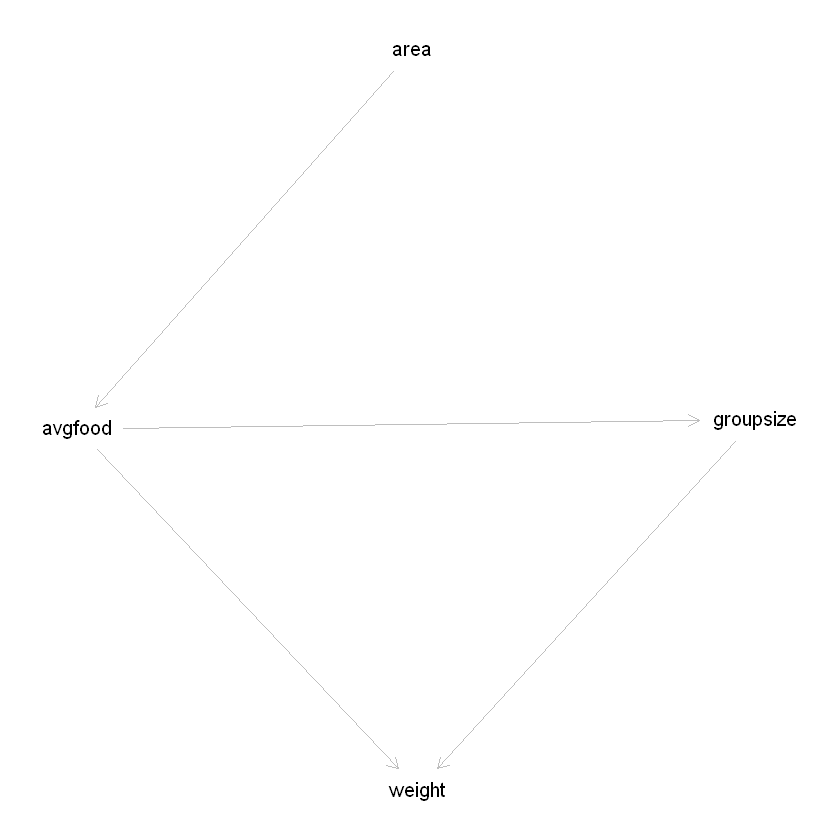

In [111]:
# DAG
fox_dag <- dagitty('dag {

bb="-2.714,-3.328,2.791,2.921"
area [pos="0.670,-1.303"]
avgfood [pos="-0.303,-0.426"]
groupsize [pos="1.662,-0.446"]
weight [pos="0.686,0.411"]

area -> avgfood
avgfood -> groupsize
avgfood -> weight
groupsize -> weight
}')

plot( fox_dag )


In [138]:
# create standardized variables 
(f <- f %>%
    mutate(area_s = area %>% scale(),
           weight_s = weight %>% scale(),
           avgfood_s = avgfood %>% scale(),
           groupsize_s = groupsize %>% scale()
          )) %>% head() %>% round(2)

,group,avgfood,groupsize,area,weight,area_s,weight_s,avgfood_s,groupsize_s
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,"<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>"
1,1,0.37,2,1.09,5.02,-2.24,0.41,-1.92,-1.52
2,1,0.37,2,1.09,2.84,-2.24,-1.43,-1.92,-1.52
3,2,0.53,2,2.05,5.33,-1.21,0.68,-1.12,-1.52
4,2,0.53,2,2.05,6.07,-1.21,1.30,-1.12,-1.52
5,3,0.49,2,2.12,5.85,-1.13,1.12,-1.32,-1.52
6,3,0.49,2,2.12,3.25,-1.13,-1.08,-1.32,-1.52


In [146]:
# M5 weight ~ area
M5 <- quap(  alist(
    weight_s ~ dnorm( mu , sigma ) ,
    mu <- a + bA*area_s ,
    a ~ dnorm( 0 , 0.2 ) ,
    bA ~ dnorm( 0 , 0.5 ) ,
    sigma ~ dexp( 1 )
) , data = f )

M5 %>% precis() %>% round(2)

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a,0.00,0.08,-0.13,0.13
bA,0.02,0.09,-0.13,0.16
sigma,0.99,0.06,0.89,1.09


In [147]:
# M4 weight ~ avgfood  
M4 <- quap(  alist(
    weight_s ~ dnorm( mu , sigma ) ,
    mu <- a + bAF*avgfood_s,
    a ~ dnorm( 0 , 0.2 ) ,
    bAF ~ dnorm( 0 , 0.5 ) ,
    sigma ~ dexp( 1 )
) , data = f )

M4 %>% precis() %>% round(2)

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a,0.00,0.08,-0.13,0.13
bAF,-0.02,0.09,-0.17,0.12
sigma,0.99,0.06,0.89,1.09


In [148]:
# #M3 weight ~ groupsize + area
M3 <- quap(  alist(
    weight_s ~ dnorm( mu , sigma ) ,
    mu <- a + bGS*groupsize_s + bA*area_s,
    a ~ dnorm( 0 , 0.2 ) ,
    bA ~ dnorm( 0 , 0.5 ) ,
    bGS ~ dnorm( 0 , 0.5 ) ,
    sigma ~ dexp( 1 )
) , data = f )

M3 %>% precis() %>% round(2)

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a,0.00,0.08,-0.13,0.13
bA,0.41,0.15,0.17,0.64
bGS,-0.48,0.15,-0.71,-0.25
sigma,0.94,0.06,0.84,1.04


In [149]:
# M2 weight ~ avgfood + groupsize
M2 <- quap(  alist(
    weight_s ~ dnorm( mu , sigma ) ,
    mu <- a + bAF*avgfood_s + bGS*groupsize_s,
    a ~ dnorm( 0 , 0.2 ) ,
    bAF ~ dnorm( 0 , 0.5 ) ,
    bGS ~ dnorm( 0 , 0.5 ) ,
    sigma ~ dexp( 1 )
) , data = f )

M3 %>% precis() %>% round(2)

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a,0.00,0.08,-0.13,0.13
bA,0.41,0.15,0.17,0.64
bGS,-0.48,0.15,-0.71,-0.25
sigma,0.94,0.06,0.84,1.04


In [150]:
# M1 weight ~ avgfood + groupsize + area

M1 <- quap(  alist(
    weight_s ~ dnorm( mu , sigma ) ,
    mu <- a + bAF*avgfood_s + bGS*groupsize_s +bA*area_s,
    a   ~ dnorm( 0 , 0.2 ) ,
    bAF  ~ dnorm( 0 , 0.5 ) ,
    bA  ~ dnorm( 0 , 0.5 ) ,
    bGS ~ dnorm( 0 , 0.5 ) ,
    sigma ~ dexp( 1 )
) , data = f )

M1 %>% precis() %>% round(2)


,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a,0.00,0.08,-0.13,0.13
bAF,0.30,0.21,-0.04,0.63
bA,0.28,0.17,0.01,0.55
bGS,-0.64,0.18,-0.93,-0.35
sigma,0.93,0.06,0.83,1.03


In [151]:
compare( M1 , M2 , M3 , M4 , M5 ) %>% round(2)

,WAIC,SE,dWAIC,dSE,pWAIC,weight
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
M1,323.26,16.30,0.00,NA,4.82,0.42
M3,323.85,15.76,0.59,3.02,3.71,0.31
M2,324.18,16.25,0.92,3.54,3.91,0.26
M4,333.47,13.95,10.21,7.13,2.45,0.00
M5,333.78,13.94,10.52,7.22,2.66,0.00


Notice that the top three models are m1, m3, and m2 have very similar WAIC values. 

* The differences are small and <font color = 'blue'>smaller in all cases than the standard error of the difference</font>. WAIC sees these models are tied. 

* <font color = 'blue'>This makes sense, given the DAG, because as long as a model has groupsize in it, we can include either avgfood or area or both and get the same inferences</font>. Another way to think of this is that the influence of avgfood, adjusting for group size, is (according to the DAG) the same as the influence of area, adjusting for group size, because the influence of area is routed entirely through food and group size. There are no backdoor paths.



What about the other two models, m4 and m5? 

* These models are tied with one another, and both omit group size. 

* Again, the influence of area passes entirely through food. So including only food or only area should produce the same inference—the total causal influence of area (or food) is just about zero. 

That’s indeed what the posterior distributions suggest:

In [153]:
coeftab(M4,M5)

      M4      M5     
a           0       0
bAF     -0.02      NA
sigma    0.99    0.99
bA         NA    0.02
nobs      116     116

In [155]:
coeftab(M1, M2, M3, M4, M5) 

      M1      M2      M3      M4      M5     
a           0       0       0       0       0
bAF      0.30    0.48      NA   -0.02      NA
bA       0.28      NA    0.41      NA    0.02
bGS     -0.64   -0.57   -0.48      NA      NA
sigma    0.93    0.94    0.94    0.99    0.99
nobs      116     116     116     116     116

# Notes

## Q1

 To compute the information entropy for the weather, suppose the true probabilities of rain and shine are p1 = 0.3 and p2 = 0.7, respectively. Then: 
 
 H(p) = −(p1 log(p1) + p2 log(p2)) ≈ 0.61

;